In [12]:
import tensorflow as tf

from tensorflow.keras import Model, layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Dropout, Flatten, BatchNormalization
from tensorflow.keras import regularizers

from teacher_model import build_teacher_model

from tensorflow.keras.datasets import cifar10


In [13]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [14]:
import numpy as np

In [15]:
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0


In [16]:
input_shape = x_train.shape[1:]
input_shape

(32, 32, 3)

In [17]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_train,y_train,test_size = 0.2, random_state = 42, stratify = y_train)


In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

augmented_data = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.1


)
augmented_data.fit(x_train)

In [19]:
model = build_teacher_model(input_shape)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_6 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_7 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                      

In [20]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
loss_fn = SparseCategoricalCrossentropy(from_logits = True)

In [21]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.schedules import ExponentialDecay

lr_schedule = ExponentialDecay(initial_learning_rate=0.001, decay_steps=10000, decay_rate= 0.8)
opt = Adam(learning_rate= 0.001)

model.compile(optimizer = opt,loss = loss_fn, metrics=['accuracy'])

In [ ]:
history = model.fit(augmented_data.flow(x_train,y_train, batch_size = 64), epochs = 100, validation_data=(x_val,y_val))

Epoch 1/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 50s 51ms/step - accuracy: 0.3323 - loss: 2.4582 - val_accuracy: 0.5244 - val_loss: 1.4690
Epoch 2/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 42ms/step - accuracy: 0.5190 - loss: 1.5422 - val_accuracy: 0.6317 - val_loss: 1.1293
Epoch 3/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 42ms/step - accuracy: 0.5888 - loss: 1.2882 - val_accuracy: 0.6089 - val_loss: 1.2931
Epoch 4/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 40ms/step - accuracy: 0.6485 - loss: 1.0797 - val_accuracy: 0.6742 - val_loss: 1.0882
Epoch 5/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.6906 - loss: 0.9598 - val_accuracy: 0.7177 - val_loss: 0.9448
Epoch 6/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 40ms/step - accuracy: 0.7042 - loss: 0.9138 - val_accuracy: 0.7236 - val_loss: 0.9271
Epoch 7/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.7274 - loss: 0.8633 - val_accuracy: 0.7714 - val_loss: 0.7542
Epoch 8/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 40ms/step - accuracy: 0.7484 - loss: 0

Text(0, 0.5, 'acc')

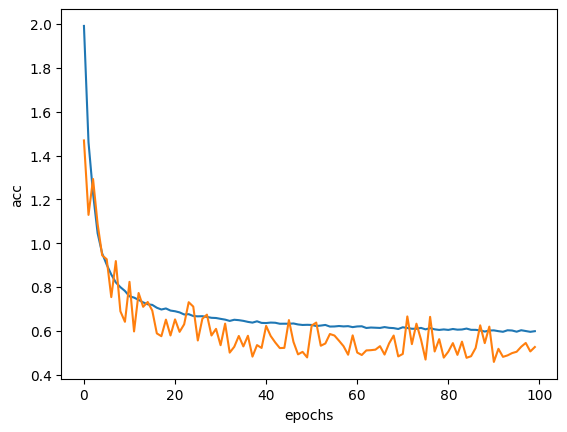

In [ ]:
epochs = history.epoch
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('acc')

Text(0, 0.5, 'acc')

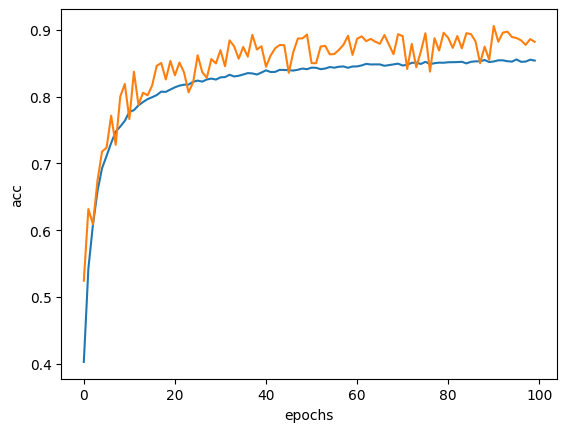

In [ ]:
plt.plot(epochs, history.history['accuracy'])
plt.plot(epochs, history.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('acc')


In [ ]:
model_json = model.to_json()
with open('model.json', 'w') as json_file:
  json_file.write(model_json)
model.save_weights('teacher_model.weights.h5')

In [ ]:
model.load_weights('teacher_model.weights.h5')

In [ ]:

model.compile(optimizer = Adam(learning_rate = 0.0001),loss = loss_fn, metrics=['accuracy'])

In [ ]:
history = model.fit(augmented_data.flow(x_train,y_train, batch_size = 64), epochs = 20, validation_data=(x_val,y_val))

Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 54s 56ms/step - accuracy: 0.8694 - loss: 0.5515 - val_accuracy: 0.9171 - val_loss: 0.4222
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 43ms/step - accuracy: 0.8792 - loss: 0.5253 - val_accuracy: 0.9121 - val_loss: 0.4275
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 35s 44ms/step - accuracy: 0.8817 - loss: 0.5183 - val_accuracy: 0.9148 - val_loss: 0.4207
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 35s 44ms/step - accuracy: 0.8849 - loss: 0.5066 - val_accuracy: 0.9213 - val_loss: 0.3958
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 42ms/step - accuracy: 0.8836 - loss: 0.4983 - val_accuracy: 0.9227 - val_loss: 0.3943
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 42ms/step - accuracy: 0.8882 - loss: 0.4885 - val_accuracy: 0.9168 - val_loss: 0.4116
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.8881 - loss: 0.4832 - val_accuracy: 0.9243 - val_loss: 0.3860
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 42ms/step - accuracy: 0.8891 - loss: 0.4853 - val_accurac

In [ ]:
model.evaluate(x_test,y_test,batch_size = 64)

157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8921 - loss: 0.4962


[0.494167685508728, 0.8902999758720398]

In [ ]:
model.save('teacher_model.h5')

In [ ]:
class_labels = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]